# Lab Work 2

### Exercice 1

1. Generate a large sample of the Gaussian distribution $\mathcal{N}(0,1)$ using a non-vectorized version of the Box-Muller algorithm. Check that your algorithm is correct by comparing the empirical distribution with the density of $\mathcal{N}(0,1).$

2. Same question using the polar algorithm.

3. Same question using a vectorized version of the Box-Muller algorithm.

4. Same question using the simulation of $\mathcal{N}(0,1)$ implemented in the function $\texttt{numpy.random.randn}.$

5. What is the method that performs best?

### Solution

1. This is an UNCOMPLETE non-vectorized version of the Box-Muller algorithm. The function $\texttt{time}$ returns the number of seconds passed since a prescribed date.

In [1]:
import numpy as np #library for numerics including random number generator
from time import time

n=1000000

t1=time()

Z=np.zeros(n)
for i in range(n//2):
    u=np.random.rand(1)
    v=np.random.rand(1)
    Z[2*i]=np.sqrt(-2*np.log(u))*np.cos(2*np.pi*v)
    Z[2*i+1]=np.sqrt(-2*np.log(u))*np.sin(2*np.pi*v) 

t2=time()

print("\nBox-Muller Run Time:", t2-t1,"\n")


Box-Muller Run Time: 7.760825157165527 



Then we draw the empirical distribution together with the density $\mathcal{N}(0,1).$

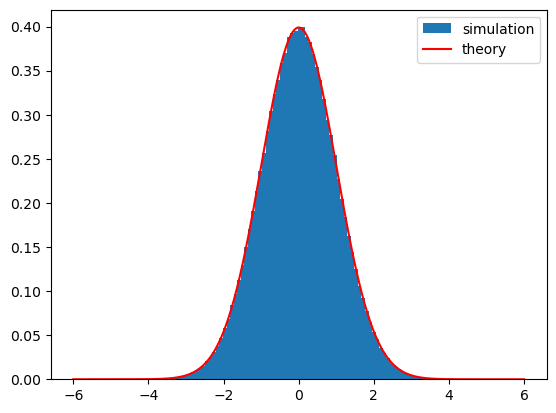

In [2]:
import matplotlib.pyplot as plt #library for plots

x=np.linspace(-6,6,1001)
y=1/np.sqrt(2*np.pi)*np.exp(-x**2/2)#density of N(0,1)

plt.hist(Z,bins=round(n**(1/3)),density=1,label="simulation")
plt.plot(x,y,"red",label="theory")
plt.legend(loc="best")

2. This is an UNCOMPLETE non-vectorized version of the polar algorithm.

In [3]:
t1=time()

Z=np.zeros(n)
for i in range(n//2): ## prima eseguo un acceptance rejection method per mettere (U,V) nel disco 
    u=-1+2*np.random.rand(1)
    v=-1+2*np.random.rand(1)
    r=u**2+v**2
    while r>1:
        u=-1+2*np.random.rand(1)
        v=-1+2*np.random.rand(1)
        r=u**2+v**2
    Z[2*i]=u*np.sqrt(-2*np.log(r)/r)
    Z[2*i+1]=v*np.sqrt(-2*np.log(r)/r)       

t2= time()

print("Polar Algorithm Run Time:",t2-t1,"\n")

Polar Algorithm Run Time: 15.843116998672485 



It remains to draw the empirical distribution together with the density $\mathcal{N}(0,1).$

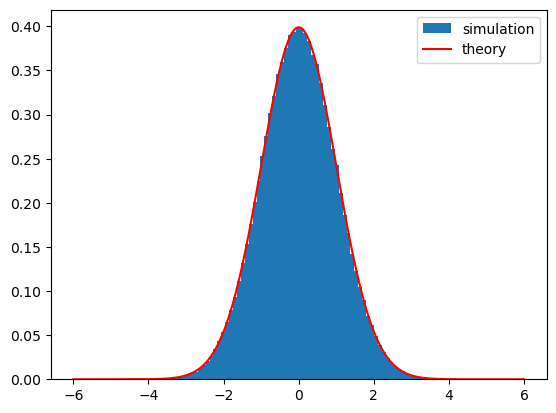

In [4]:
x=np.linspace(-6,6,1001)
y=1/np.sqrt(2*np.pi)*np.exp(-x**2/2)#density of N(0,1)

plt.hist(Z,bins=round(n**(1/3)),density=1,label="simulation")
plt.plot(x,y,"red",label="theory")
plt.legend(loc="best")

3. This is an UNCOMPLETE vectorized version of the Box-Muller algorithm.

In [8]:
t1=time()

U=np.random.rand(n//2)
V=np.random.rand(n//2)

X=np.sqrt(-2*np.log(U))*np.cos(2*np.pi*V)
Y=np.sqrt(-2*np.log(U))*np.sin(2*np.pi*V) 
Z=np.concatenate((X,Y))

t2=time()

print("Vectorized Box-Muller Run Time:",t2-t1,"\n")

Vectorized Box-Muller Run Time: 0.08941793441772461 



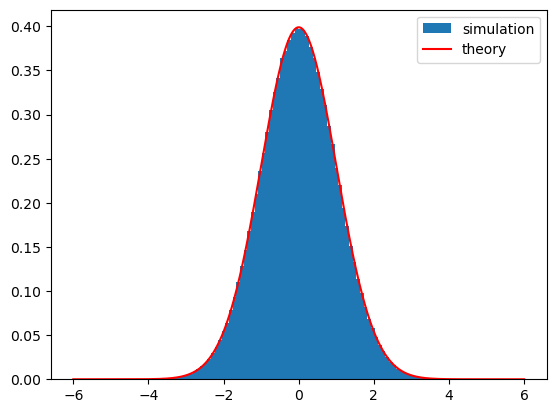

In [6]:
x=np.linspace(-6,6,1001)
y=1/np.sqrt(2*np.pi)*np.exp(-x**2/2)#density of N(0,1)

plt.hist(Z,bins=round(n**(1/3)),density=1,label="simulation")
plt.plot(x,y,"red",label="theory")
plt.legend(loc="best")

4. The function $\texttt{np.random.randn}$ generates independent $\mathcal{N}(0,1).$

In [9]:
t1=time()
Z=np.random.randn(n)
t2=time()

print('The np.random.randn generates n independent standard gaussian in:',t2-t1)

The np.random.randn generates n independent standard gaussian in: 0.10783720016479492


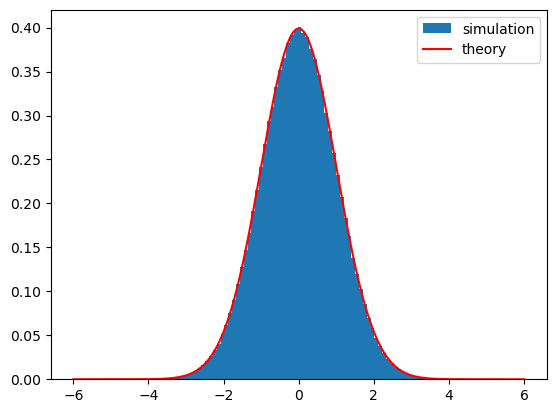

In [10]:
x=np.linspace(-6,6,1001)
y=1/np.sqrt(2*np.pi)*np.exp(-x**2/2)#density of N(0,1)

plt.hist(Z,bins=round(n**(1/3)),density=1,label="simulation")
plt.plot(x,y,"red",label="theory")
plt.legend(loc="best")